In [1]:
import numpy as np
import deepchem as dc
from deepchem.molnet import load_tox21
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/mmasood1/.conda/envs/env_arslan/lib/python3.9/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
# Load Tox21 dataset
tox21_tasks, data, transformers = load_tox21(reload = False, splitter = None)
data = data[0]

[18:16:25] WARNING: not removing hydrogen atom without neighbors


In [3]:
df = pd.DataFrame(data.y)
df.columns = data.get_task_names().tolist()
# missing labels 
df[data.w == 0] = np.nan

row_sums = df.sum(axis=1)
col_sums = df.sum()

# Sort rows and columns based on their sums
sorted_row_indices = row_sums.sort_values(ascending=False).index
sorted_col_indices = col_sums.sort_values(ascending=False).index

# Reorder the DataFrame using the sorted row and column indices
sorted_df = df.loc[sorted_row_indices, sorted_col_indices]
sorted_df.fillna(-1, inplace = True)

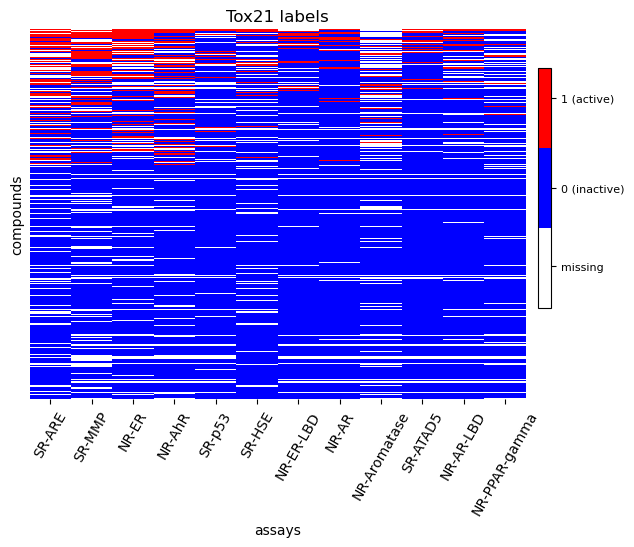

In [4]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cmap_binary = ListedColormap(['white','blue', 'red'])
heatmap = sns.heatmap(sorted_df, ax = ax, cmap = cmap_binary, cbar = False)
ax.set_yticks([])
#ax.set_xticks([])

# Add a figure-level colorbar
mappable = heatmap.get_children()[0]
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cbar = plt.colorbar(mappable, cax = cbar_ax,orientation = 'vertical')
cbar.set_ticks([-0.65, 0,0.75])
labels  = ['missing','0 (inactive)', '1 (active)']
cbar.set_ticklabels(labels)
cbar.ax.set_yticklabels(labels , rotation=0, fontsize = 8)

ax.tick_params(axis='x', rotation=60)
ax.set_ylabel('compounds')
ax.set_xlabel('assays')
ax.set_title('Tox21 labels')
fig.savefig("/home/mmasood1/.TG GATE/Fig/invitro/Tox21_y_space.PNG", dpi = 300, bbox_inches='tight')

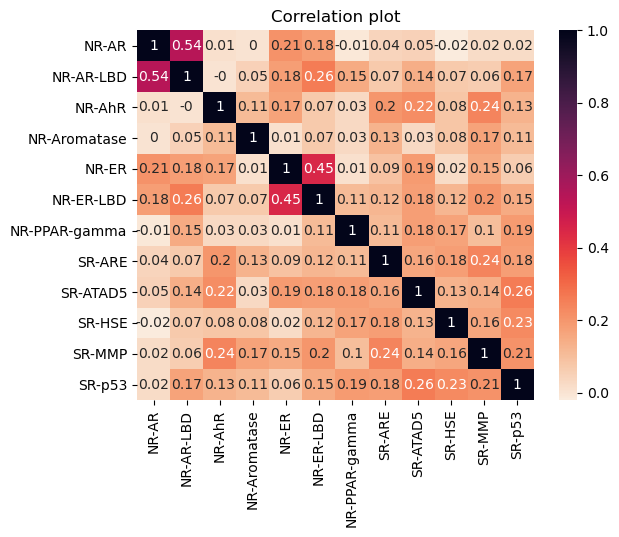

In [5]:
df = pd.DataFrame(data.y)
df.columns = data.get_task_names().tolist()

fig, ax = plt.subplots()
sns.heatmap(df.corr().round(2), annot = True, cmap = "rocket_r", ax = ax)
ax.set_title("Correlation plot")
fig.savefig("/home/mmasood1/.TG GATE/Fig/invitro/Tox21_Correlations.PNG", dpi = 300, bbox_inches='tight')

In [18]:
NR_AR = pd.DataFrame(df.corr().iloc[:,0]).reset_index()
NR_AR.columns = ["Task", "Corelation"]
NR_AR.sort_values(by = ("Corelation"), ascending= False)

,Task,Corelation
0,NR-AR,1.000000
1,NR-AR-LBD,0.538513
4,NR-ER,0.208096
5,NR-ER-LBD,0.184715
8,SR-ATAD5,0.052997
7,SR-ARE,0.035952
10,SR-MMP,0.021974
11,SR-p53,0.021209
2,NR-AhR,0.014767
3,NR-Aromatase,0.003972


In [17]:
NR_AR

,Task,Corelation
0,NR-AR,1.000000
1,NR-AR-LBD,0.538513
2,NR-AhR,0.014767
3,NR-Aromatase,0.003972
4,NR-ER,0.208096
5,NR-ER-LBD,0.184715
6,NR-PPAR-gamma,-0.010077
7,SR-ARE,0.035952
8,SR-ATAD5,0.052997
9,SR-HSE,-0.023678
